## Customer Churn Analysis

### Project Description

- Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
- Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
- Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low

- You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models

Dataset Link-  
- https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
## Importing Necessary Libaries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
## Importing Dataset
df = pd.read_csv('churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- The Given Dataset contains 7034 rows and 21 columns
- The Problem statement states to predict Customer Churn so that makes this problem a classification problem.

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There are 3 numerical columns in the Dataset and 18 Categorical features in the Dataset which needs to be encoded.
- There seems to be no NULL values present in the Dataset
- We dont need feature 'CustomerID' because it is unique for every observation and hence has no need in prediction.

In [4]:
df = df.drop('customerID', axis = 1)

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- Seperating features in Numerical and Categorical Data

In [7]:
Numericals_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [8]:
Numericals_features

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [9]:
Categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

True

In [12]:
values_to_find = ['NA', 'N/A', '-', ' ', '?', ' ?']

# find the rows that contain the specified values
rows_with_values = df.isin(values_to_find).any(axis=1)

# display the resulting dataframe
df[rows_with_values]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.shape

(7043, 20)

In [14]:
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [15]:
for col in Categorical_features:
    print(col)
    print(df[col].value_counts())
    print("*"*50)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
**************************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**************************************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************************************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
**************************************************
OnlineBackup
N

- The column CustomerID is not needed because it has a unique value for each observation and hence it not useful in prediction.
- The feature Total charges has 11 rows with blank values which needs to be treated.

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

- Now we wil convert the TotalCharges column to Numerical feature

In [17]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

- Since the feature Senior Citizen has 2 types of values then we can convert it to Object type

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

In [19]:
## Seperating the Numerical and Categorical feature again
Numericals_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [20]:
print(Numericals_features)
print(Categorical_features)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [21]:
df.shape

(7043, 20)

### Data Visualization

- count plot

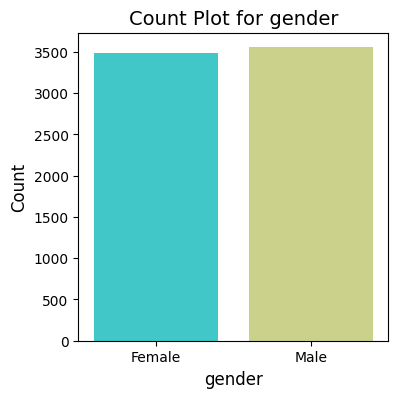

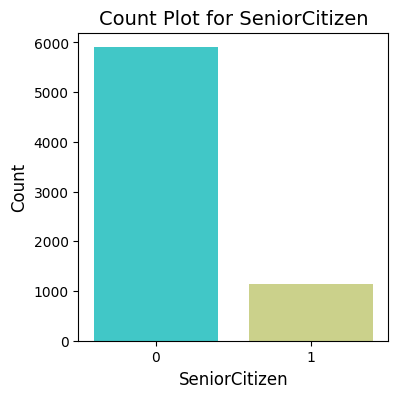

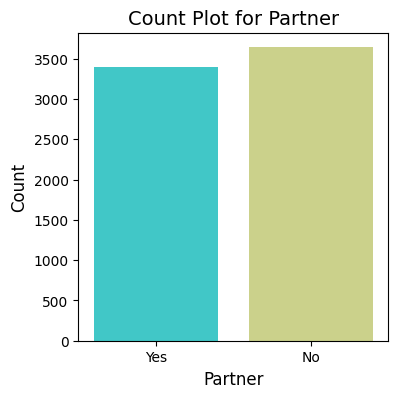

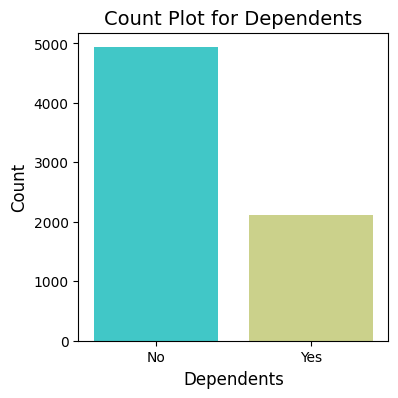

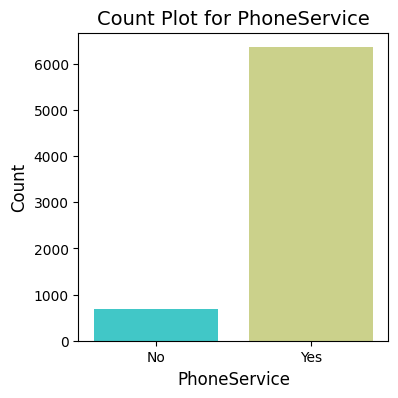

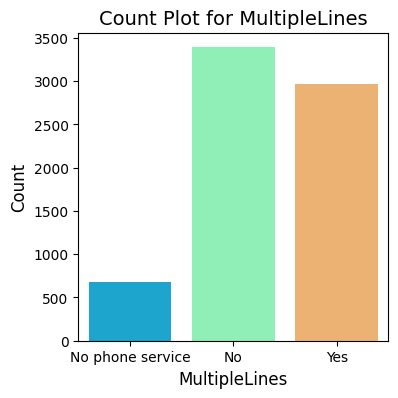

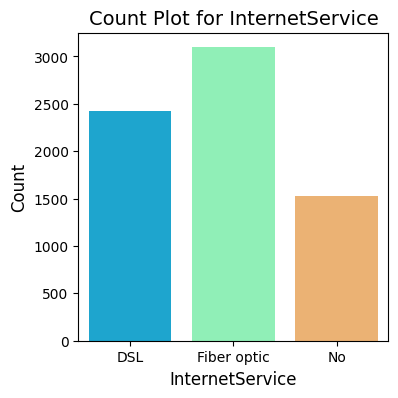

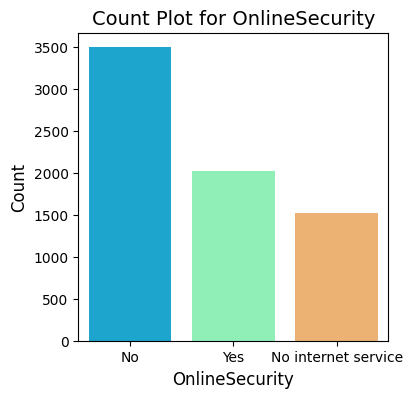

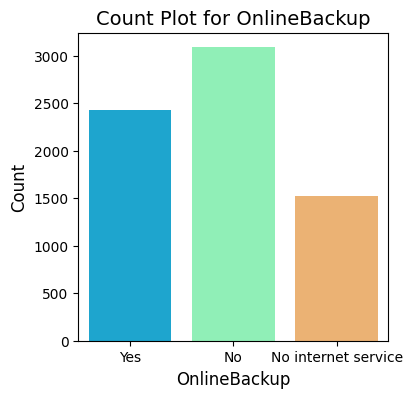

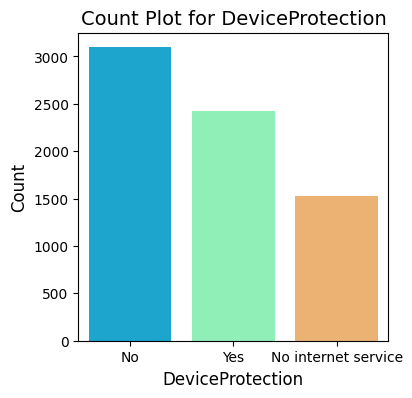

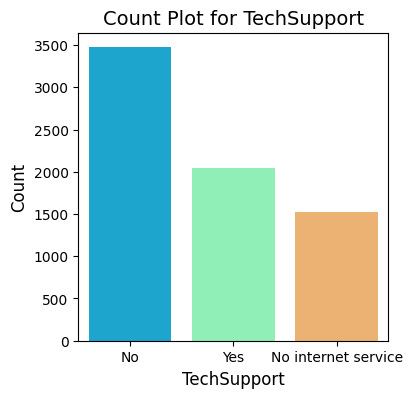

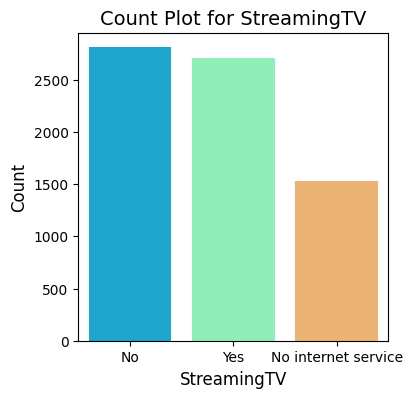

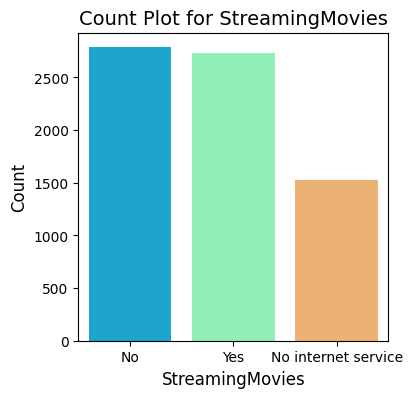

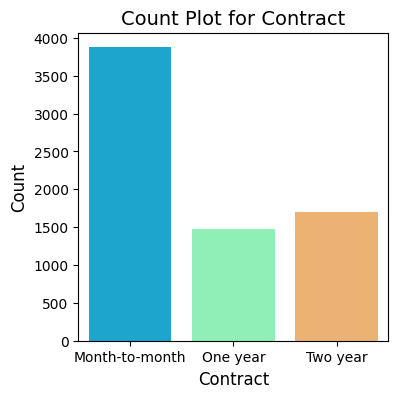

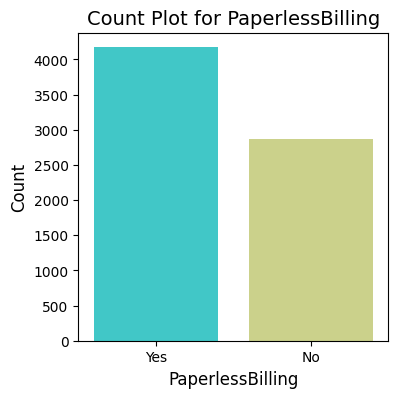

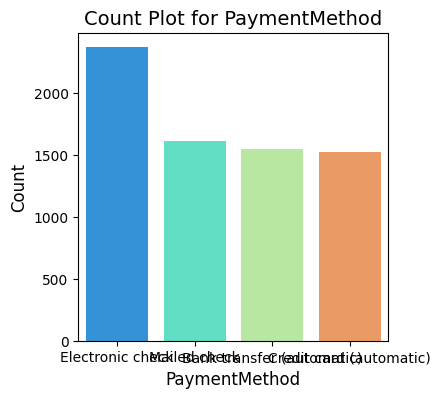

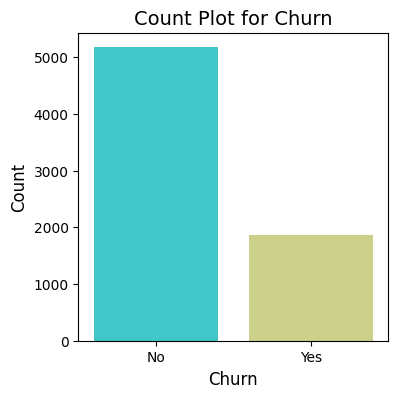

In [22]:
for feature in Categorical_features:
    plt.figure(figsize=(4,4))
    sns.countplot(x=feature, data=df, palette='rainbow')
    plt.title(f"Count Plot for {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

Observations:
- The number observation for 'No' is far higher than 'Yes' which makes the Dataset Imbalanced
- In feature 'Gender' we can see that the customer churn for males and females are almost the same with males being a littler more than feamles.
- In the feature 'Senoir Citizen' we can see that the number of senior citizen is quite low compared to non-senior ctizens
- In feature 'Partner' we can see that the people with or without partners are almost the same with a little more data points for people without partners.
- In feature 'Dependent' we can see that people with dependents are a lot less than people with no Dependents.
- In feature 'Phone Service' people with a phone service are a lot compared to people who Don't have a phone service.
- In feature 'Internet Service' majority of people have a high speed internet while there are many people who do not own an internet service.
- In feature 'Online Security' poeple with internet service need Security while people with no Internet service Don't need it.
- In feature 'Devoce Protection' people without any device protection is higher in number as compared to people who have some kind of device protection.
- In feature 'Tech Support' people who do not need technical support is higher in number as compared to people who need technical assistance.
- In feature 'Stream Tv' people who do not use streaming TV service is slightly higher than the people who do use streaming TV service.
- In feature 'Contract' a lot of people who prefer the month to month contract over the 1 year or 2 year contract term.
- In feature 'Payment Method'preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option have same no of people.
- In feature 'Paperlessbill' people who prefer paper less billing are high. 

#### Bivariate Analysis

In [23]:
Categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Text(0.5, 1.05, 'Bivariate Analysis for Categorical Features')

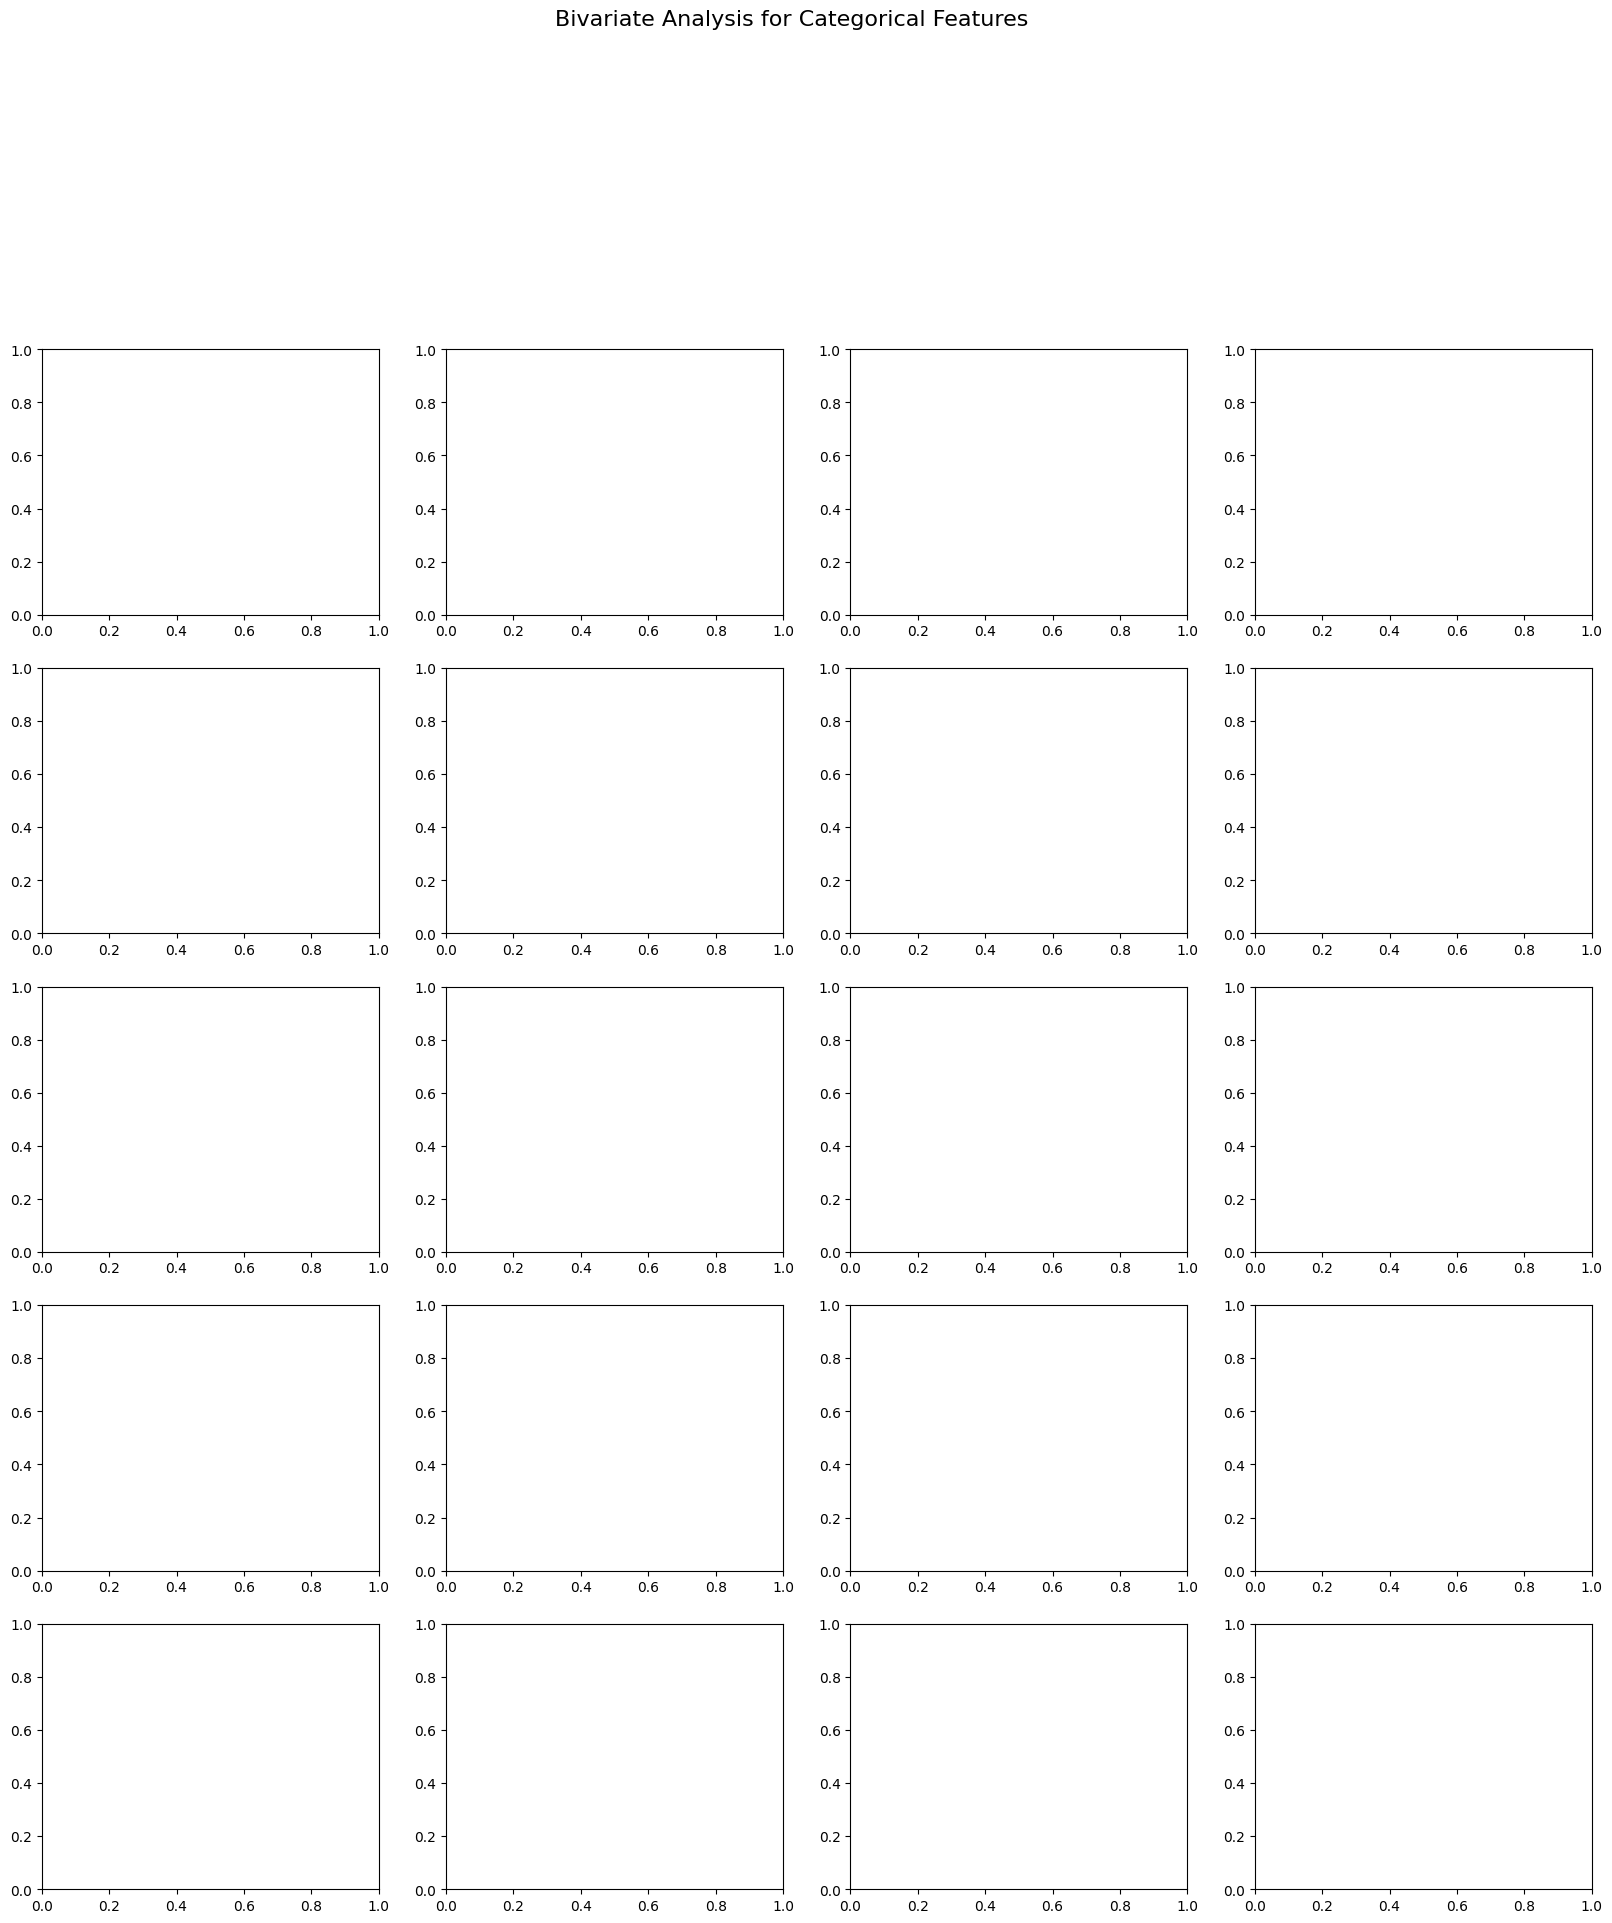

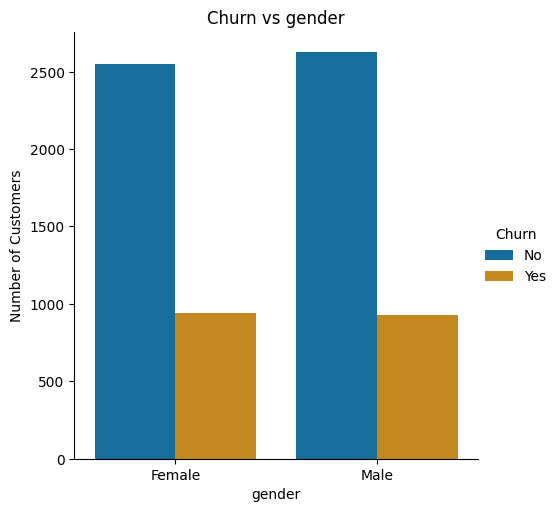

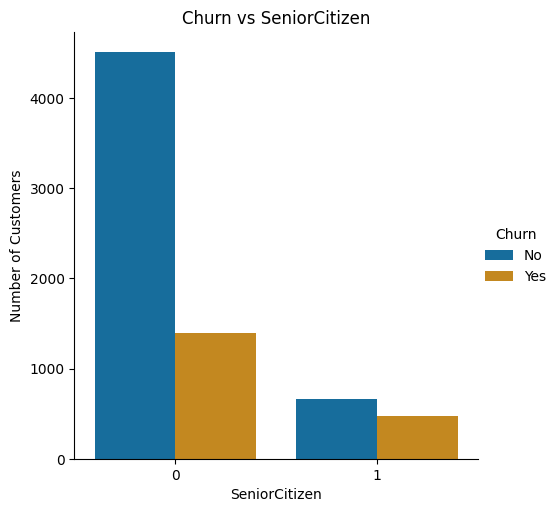

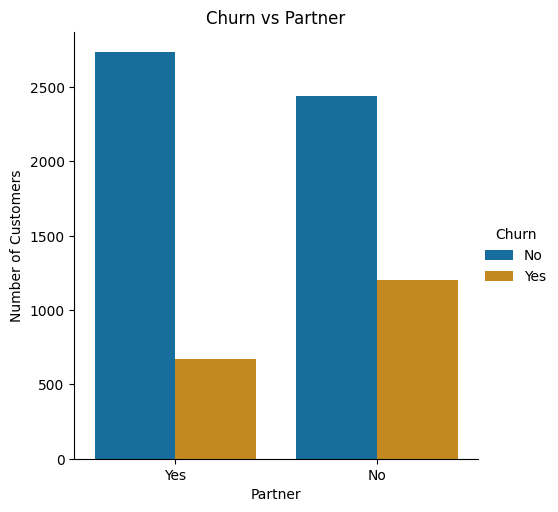

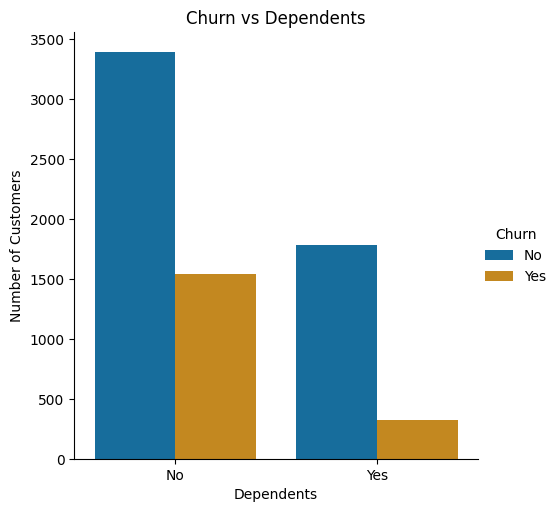

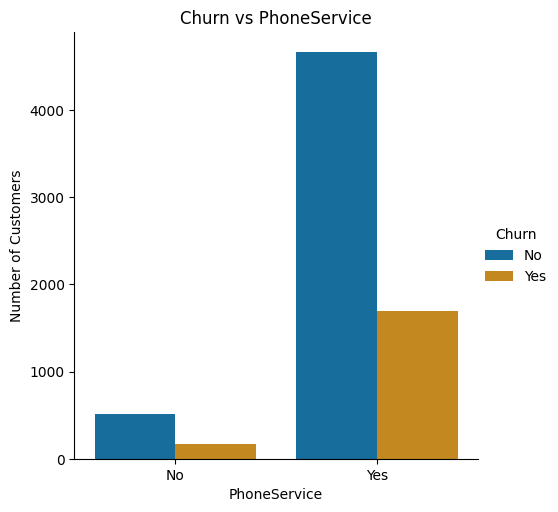

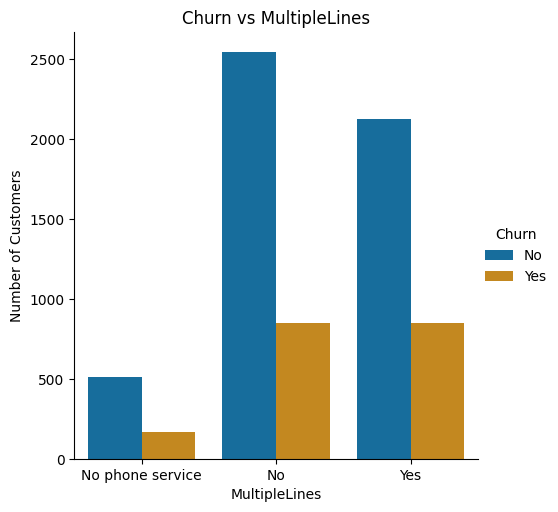

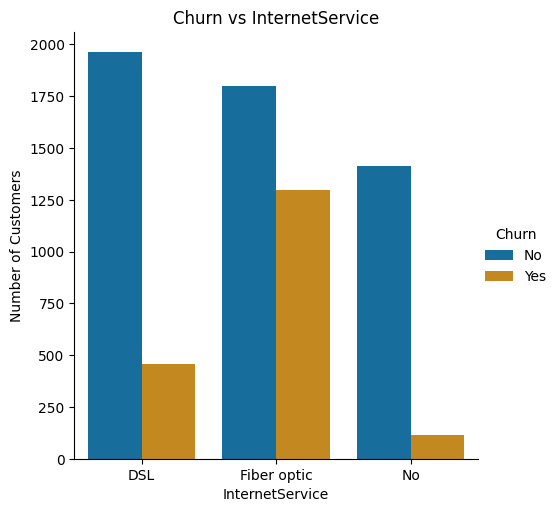

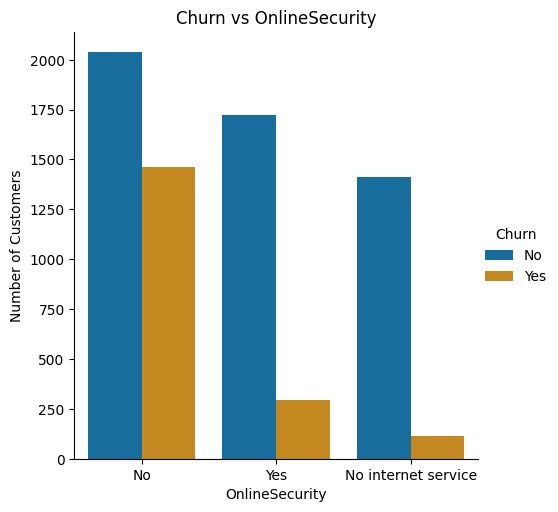

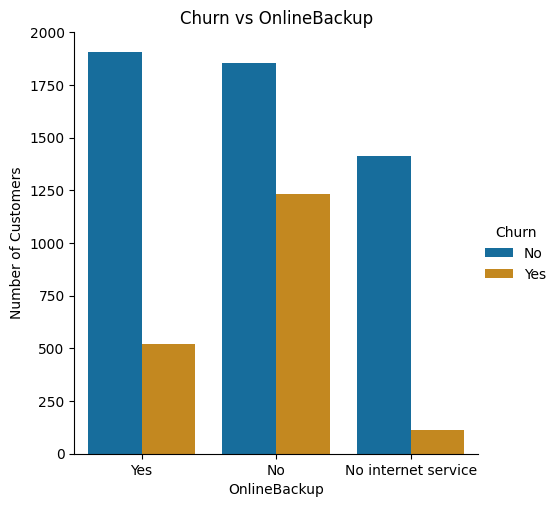

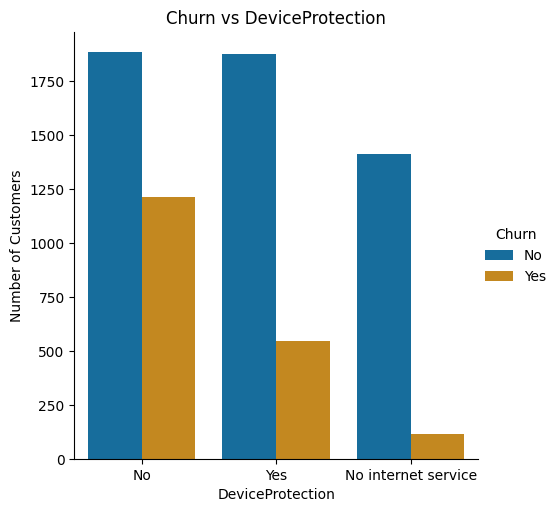

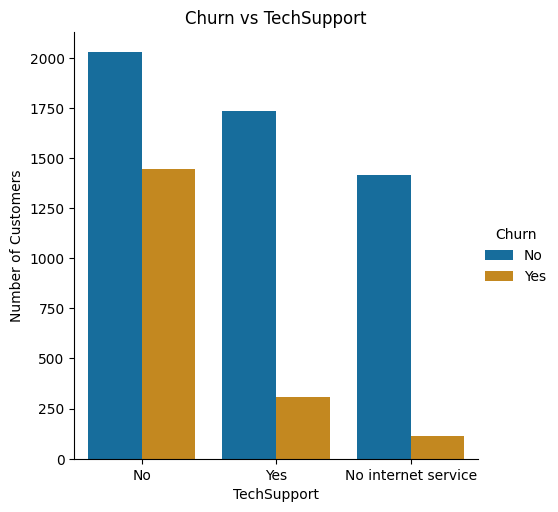

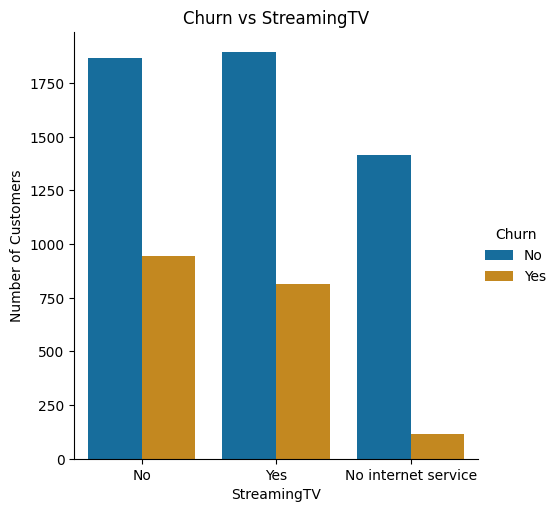

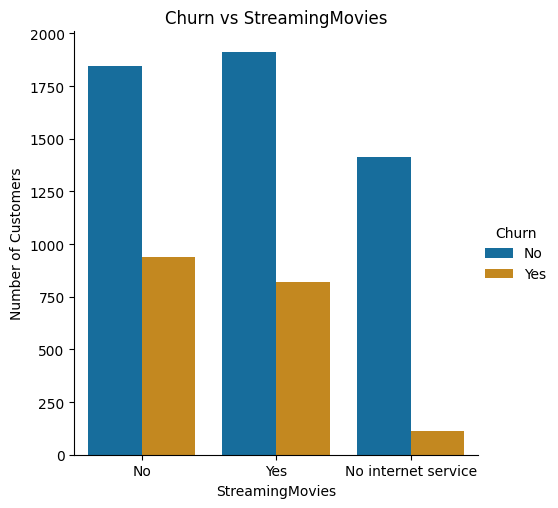

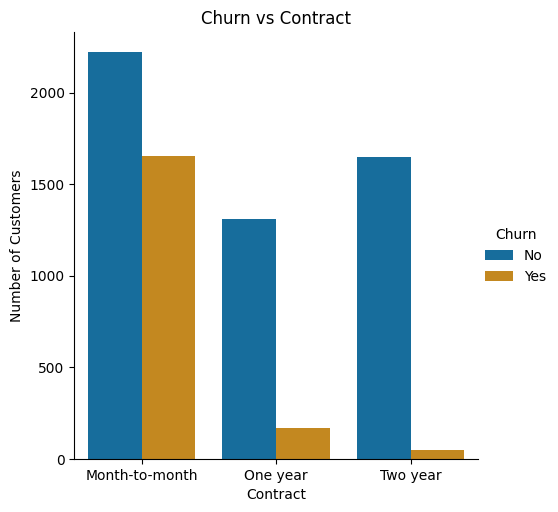

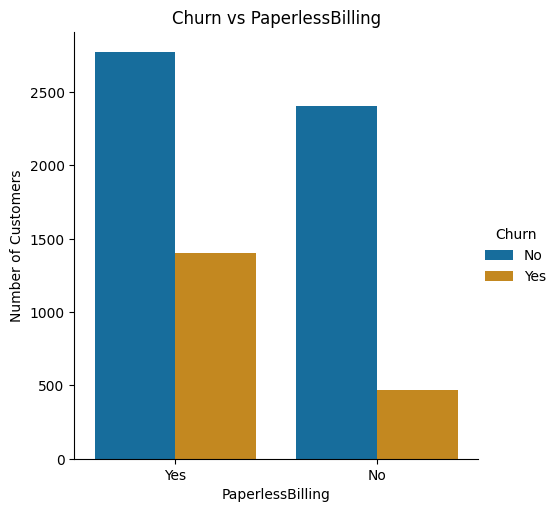

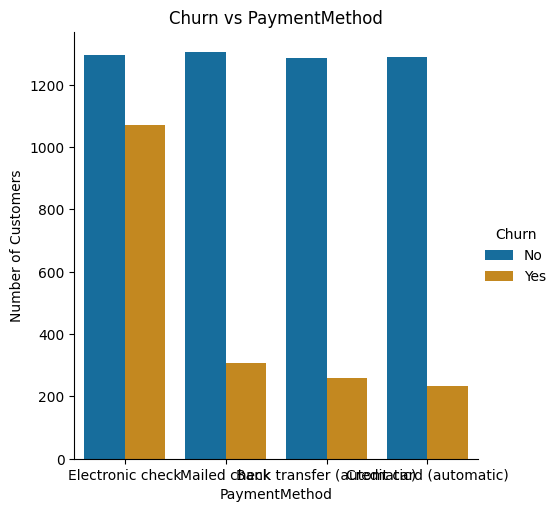

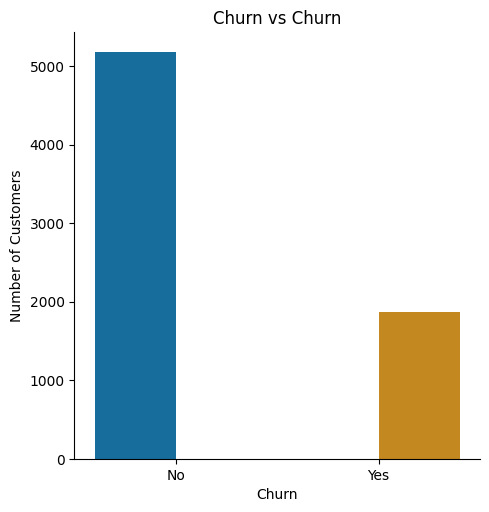

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Iterate through each feature and plot the count plot
for i, col_name in enumerate(Categorical_features):
    ax = sns.catplot(x=col_name, hue='Churn', kind='count', data=df, palette='colorblind', ax=axes[i])
    ax.set(title=f'Churn vs {col_name}', xlabel=col_name, ylabel='Number of Customers')

# Set the overall title
fig.suptitle('Bivariate Analysis for Categorical Features', fontsize=16, y=1.05)

<AxesSubplot: xlabel='TotalCharges', ylabel='Density'>

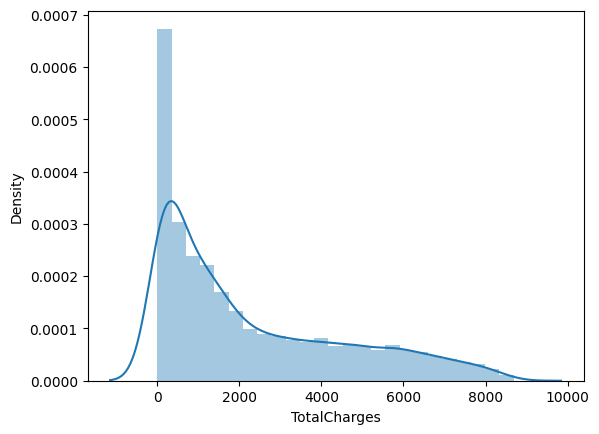

In [25]:
df_visualisation = df[['MonthlyCharges','TotalCharges', 'tenure']].copy()

sns.distplot(df_visualisation['TotalCharges'], kde = True)

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

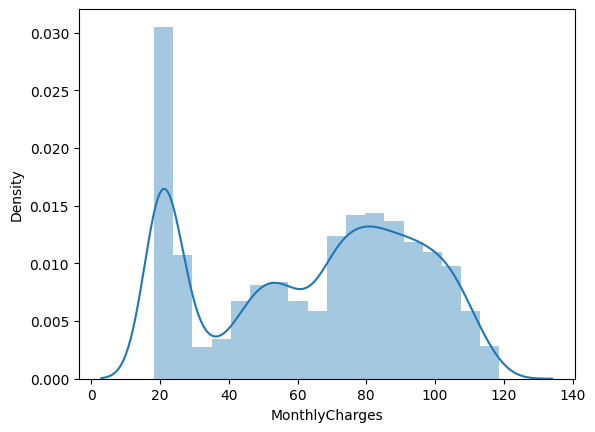

In [26]:
sns.distplot(df_visualisation['MonthlyCharges'], kde = True)

<AxesSubplot: xlabel='tenure', ylabel='Density'>

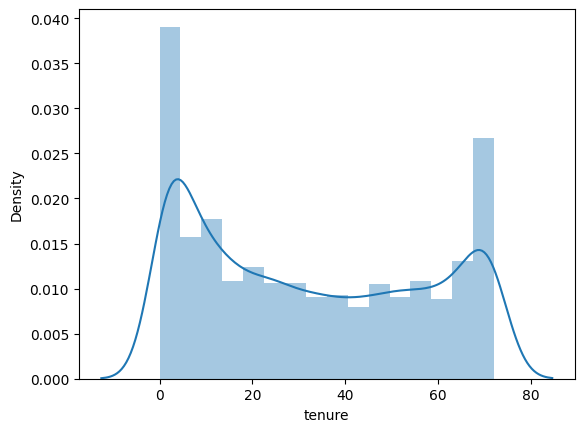

In [27]:
sns.distplot(df_visualisation['tenure'], kde = True)

### Encoding the Categorical Data

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [29]:
Encoder = LabelEncoder()
df["Churn"] = Encoder.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- We have encoded the Output feature

- Now we will encode other features,
- Since the number of Categorical features are high we will make a function to avoid Redundancy

In [30]:
from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode
cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# Loop through columns and encode each one
for col in cols_to_encode:
    ordinal = OrdinalEncoder()
    df[col] = ordinal.fit_transform(df[[col]])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


- We have successfully encoded all the features and we can proceed Further.

In [31]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Outlier Detection

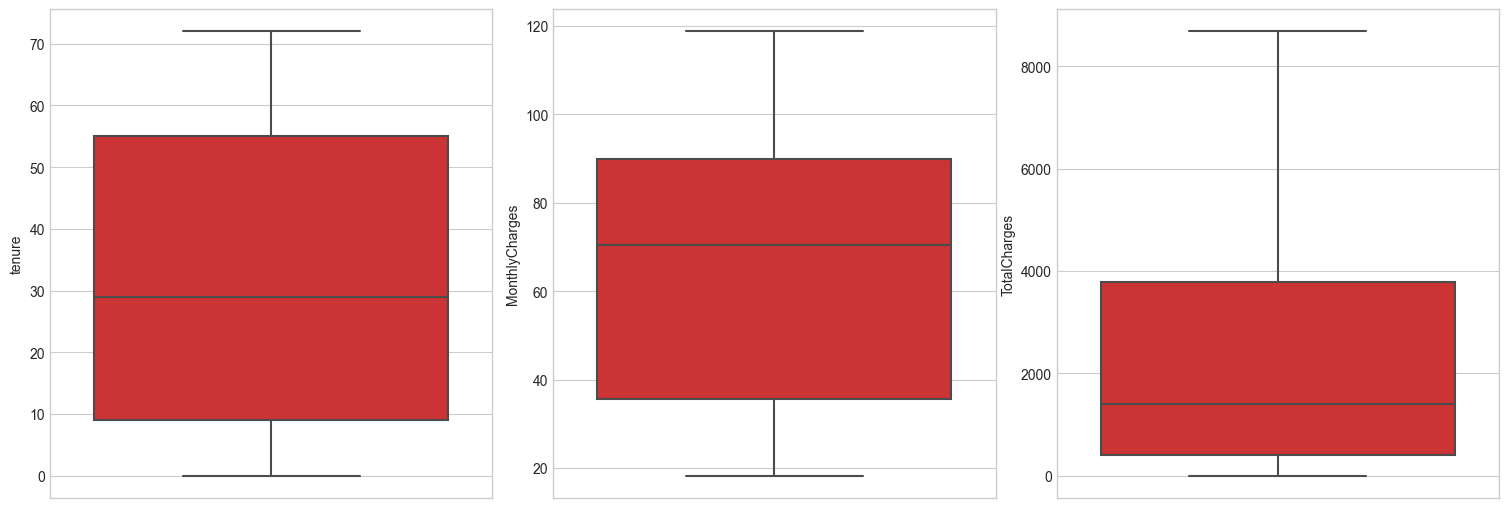

In [32]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- From the above Boxplot we can see that there seems to be no Outliers in the Dataset and we can proceed further.

#### Checking Skewness by Analyzing the Distribution

In [33]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

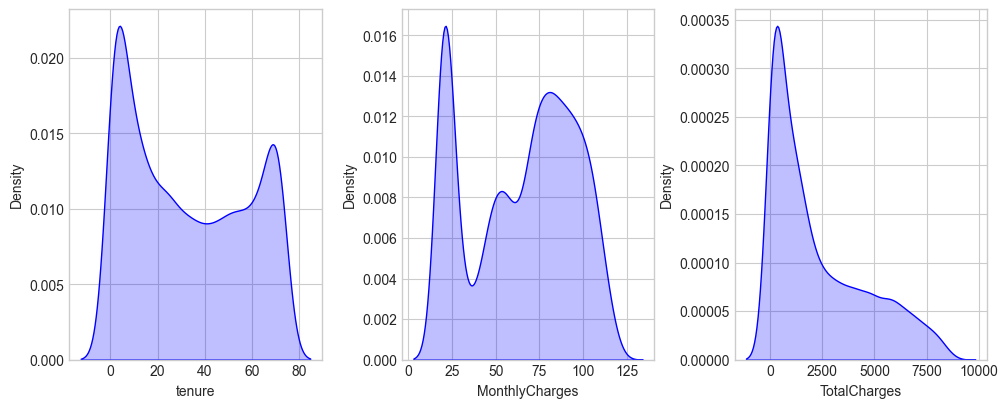

In [34]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10,4))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- The feature seems to be skewed which needs to be trated

Using log transformation to remove skewness.

In [35]:
for col in Numericals_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [36]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.824458
Churn               1.063031
dtype: float64

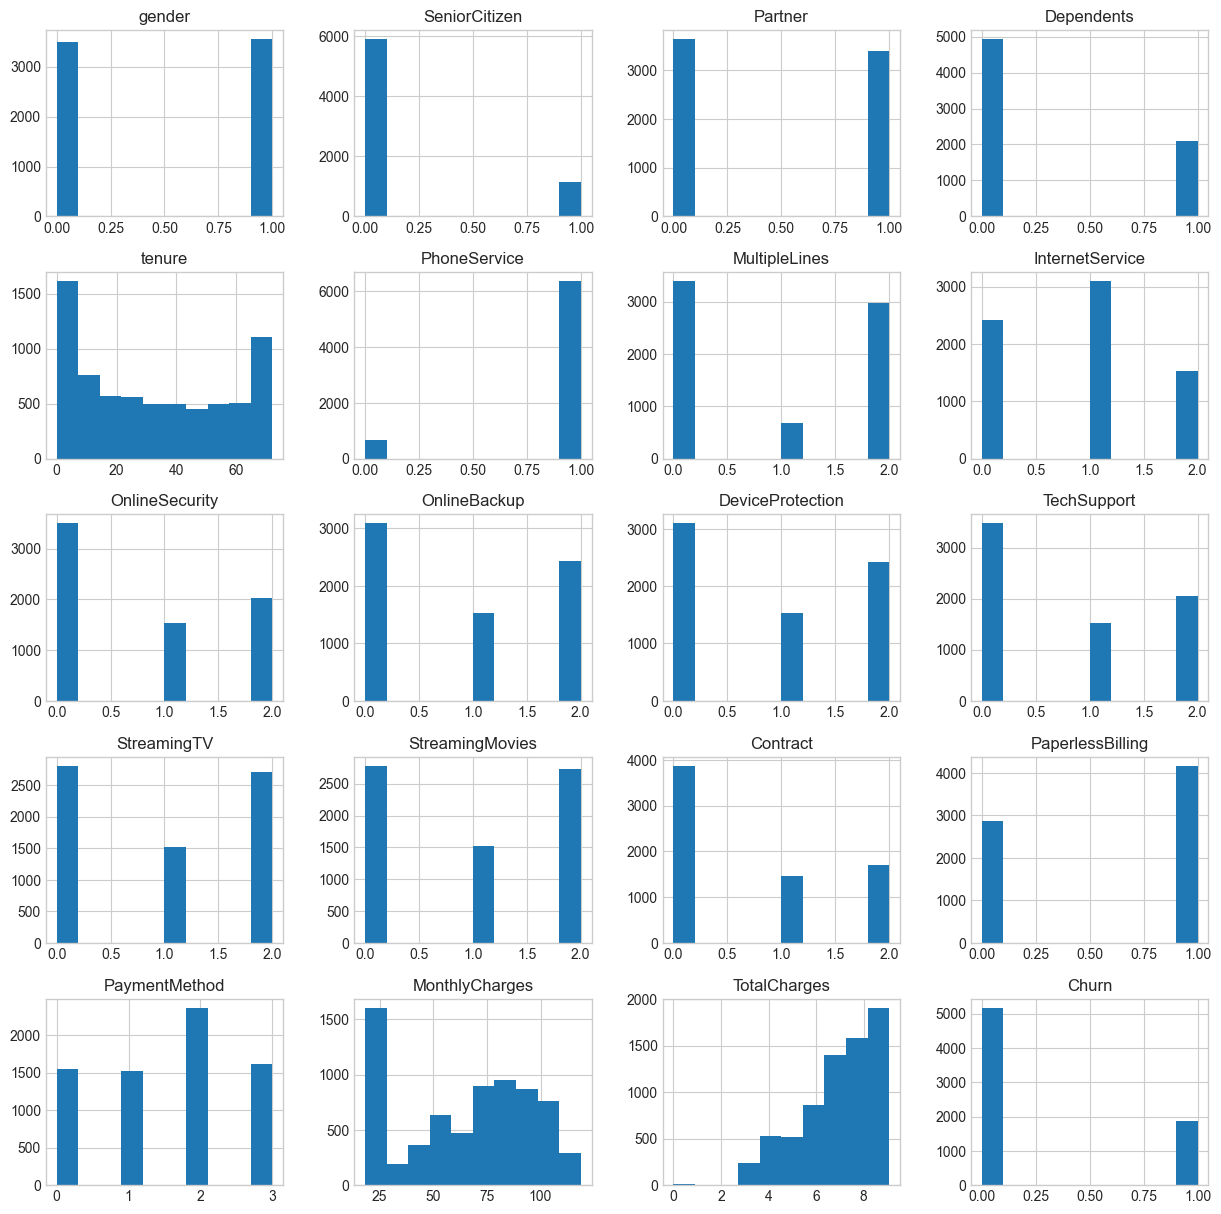

In [37]:
df.hist(figsize=(15,15))
plt.show()

- We can see the Distributio of various features in the Dataset using Distribution plot.

### Correlation

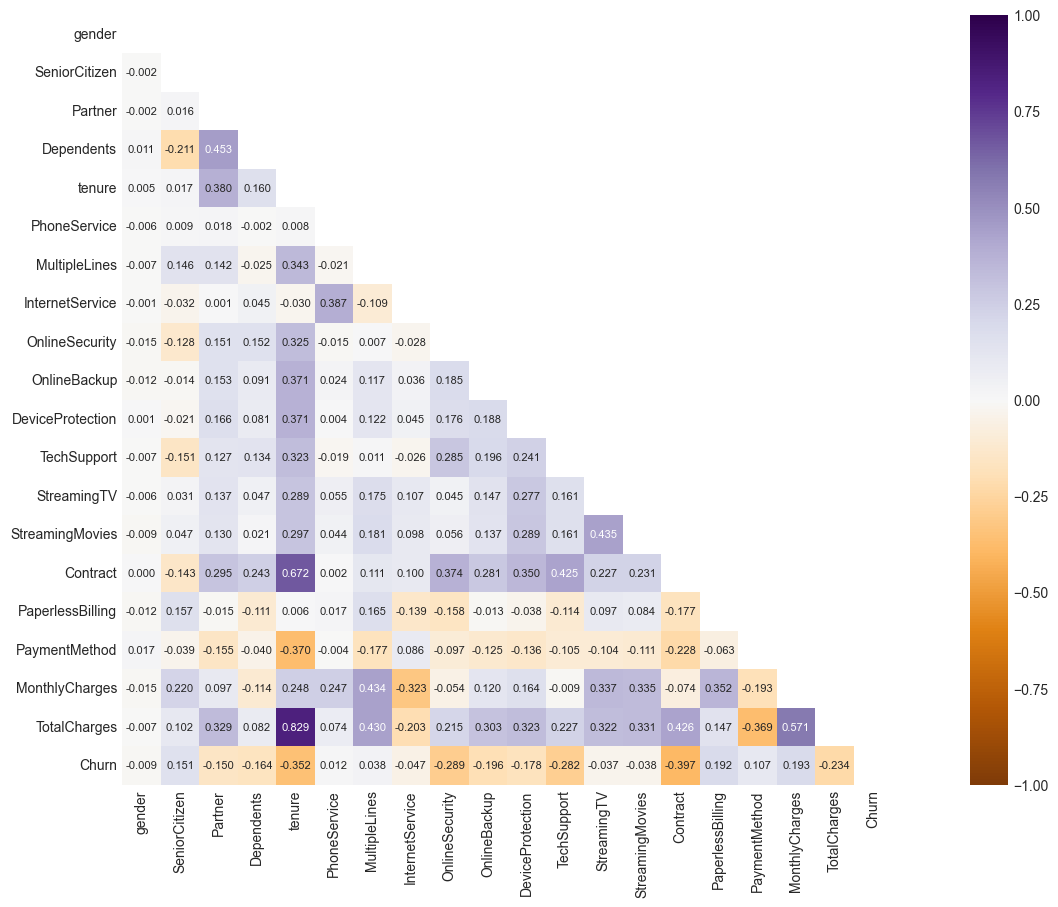

In [38]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="PuOr", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- We can see the correlation between the features.
- Lets check with barplot

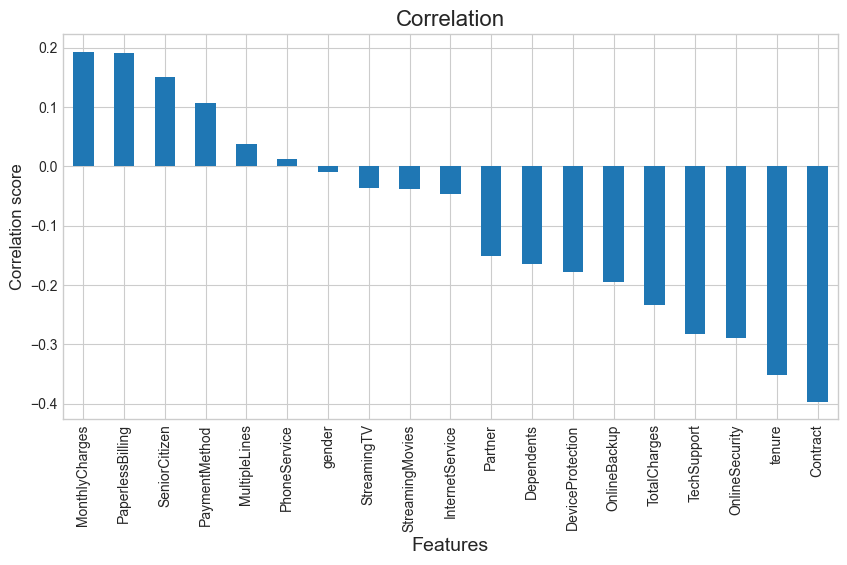

In [39]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Correlation score", fontsize=12)
plt.show()

- The features 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod', 'MultipleLines', have a positive correlation with output feature.
- The features 'Contract', 'tenure', 'OnlineSecurity', 'Tecsupport', 'OnlineBackup', 'DeviceProtection' with 2 other features have negative correlation with Output feature.

### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [40]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [41]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.429137
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,7.544597
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.692723
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,7.518471
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.028148


In [42]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [43]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- From the above we can see that the Dataset is highly Imbalanced so we need to balance it.

In [44]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [45]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

- The Dataset is balanced with the help of SMOTE

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.048113,-0.515227,1.178816,-0.59998,-1.094199,-3.145838,0.044334,-1.272033,-0.780282,1.377100,-0.925931,-0.790456,-1.081335,-1.084451,-0.665922,0.764213,0.358364,-1.318531,-2.011412
1,1.041567,-0.515227,-0.913120,-0.59998,0.273546,0.322743,-1.024520,-1.272033,1.653109,-0.918959,1.367310,-0.790456,-1.081335,-1.084451,0.642012,-1.392150,1.375286,-0.377743,0.512588
2,1.041567,-0.515227,-0.913120,-0.59998,-1.052752,0.322743,-1.024520,-1.272033,1.653109,1.377100,-0.925931,-0.790456,-1.081335,-1.084451,-0.665922,0.764213,1.375286,-0.485361,-1.236458
3,1.041567,-0.515227,-0.913120,-0.59998,0.729460,-3.145838,0.044334,-1.272033,1.653109,-0.918959,1.367310,1.630035,-1.081335,-1.084451,0.642012,-1.392150,-1.675481,-0.886324,0.496565
4,-1.048113,-0.515227,-0.913120,-0.59998,-1.052752,0.322743,-1.024520,0.211572,-0.780282,-0.918959,-0.925931,-0.790456,-1.081335,-1.084451,-0.665922,0.764213,0.358364,0.099594,-1.030743


### Model Building

In [47]:
## Importing Neccessary Libraries for classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

## Importing Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Train Test Split and Finding the best random state for the models

In [49]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 79.70622342481639 for Random State 702


- Our best random state seem to be 702

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=702)

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Churn'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [52]:
def Churn(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=702)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [53]:
model = LogisticRegression()
Churn(model, X, y)

Accuracy Score: 79.70622342481639

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1279
           1       0.78      0.84      0.81      1308

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

Cross Validation Score: 77.52232986133001

Accuracy Score - Cross Validation Score is 0.4444269998992212


#### Support Vector Classifier

In [54]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=129)
Churn(model, X, y)

Accuracy Score: 84.26749130266718

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1279
           1       0.83      0.86      0.85      1308

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587

Cross Validation Score: 81.98776509924512

Accuracy Score - Cross Validation Score is -4.021008238015895


#### Decision Tree Classifier

In [55]:
model = DecisionTreeClassifier()
Churn(model, X, y)

Accuracy Score: 80.1700811751063

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1279
           1       0.80      0.81      0.80      1308

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

Cross Validation Score: 80.15195559945177

Accuracy Score - Cross Validation Score is -2.185198738222539


#### Random Forest Classifier

In [56]:
model = RandomForestClassifier(random_state=129)
Churn(model, X, y)

Accuracy Score: 86.89601855431

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1279
           1       0.89      0.84      0.87      1308

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587

Cross Validation Score: 85.0613683008665

Accuracy Score - Cross Validation Score is -7.094611439637276


#### K Neighbors Classifier

In [57]:
model=KNeighborsClassifier(n_neighbors=15)
Churn(model, X, y)

Accuracy Score: 79.39698492462311

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.77      1279
           1       0.75      0.90      0.82      1308

    accuracy                           0.79      2587
   macro avg       0.81      0.79      0.79      2587
weighted avg       0.81      0.79      0.79      2587

Cross Validation Score: 77.38710618913196

Accuracy Score - Cross Validation Score is 0.579650672097273


#### Extra Trees Classifier

In [58]:
model=ExtraTreesClassifier()
Churn(model, X, y)

Accuracy Score: 87.05063780440665

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1279
           1       0.89      0.85      0.87      1308

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587

Cross Validation Score: 85.83431516076988

Accuracy Score - Cross Validation Score is -7.867558299540647


#### XGB Classifier

In [59]:
model=xgb.XGBClassifier(verbosity=0)
Churn(model, X,y)

Accuracy Score: 85.73637417858522

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1279
           1       0.88      0.83      0.86      1308

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

Cross Validation Score: 84.0661525206464

Accuracy Score - Cross Validation Score is -6.099395659417169


- The model with the highest accuracy score among the given options is the Extra Trees Classifier with an accuracy score of 87.05%. However, the accuracy score is not the only metric to consider. It is also important to look at the cross-validation score and the difference between the accuracy score and cross-validation score. The model with the highest cross-validation score is the Random Forest Classifier with a score of 85.06%.

- The difference between the accuracy score and cross-validation score can be an indicator of overfitting. A smaller difference suggests that the model is generalizing well and is not overfitting the training data. In this case, the Random Forest Classifier has the smallest difference of -7.09%, followed by the Extra Trees Classifier with a difference of -7.87%. Therefore, the Random Forest Classifier may be the best model among the given options.

### Hyperparameter tuning the Best Model

- We will use Randomized Search CV to first Narrow down.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [61]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=702,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=702, verbose=2)

In [62]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini'}

In [63]:
best_random_grid = rf_randomcv.best_estimator_

Using these parameters in GridSearch CV

In [64]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [0, 100, 200, 300, 400]}


In [65]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1000],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [66]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 1000,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

In [67]:
grid_search.best_score_

0.8637318986617132

In [68]:
Final_Model = RandomForestClassifier(n_estimators=400,criterion="gini", max_depth=1000,min_samples_leaf=1 ,min_samples_split=4, n_jobs=1, random_state=702)
Classifier = Final_Model.fit(X_train, y_train)
y_pred = Final_Model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print("Accuracy score for the Best Model is:", accuracy)

Accuracy score for the Best Model is: 87.19806763285024


#### AUC ROC score

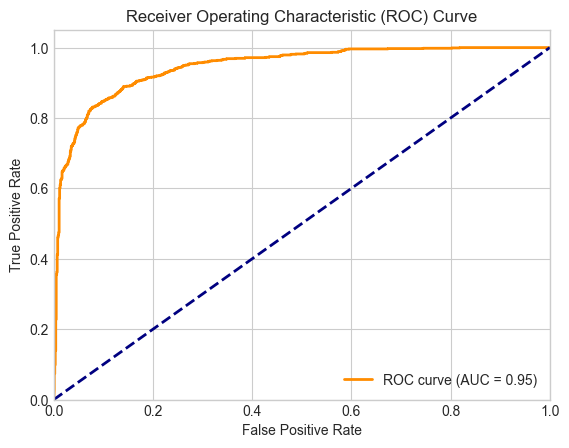

In [71]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_score = Final_Model.predict_proba(X_test)[:, 1]

# calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- The Auc score is 0.95 which is high

### Confusion Matrix

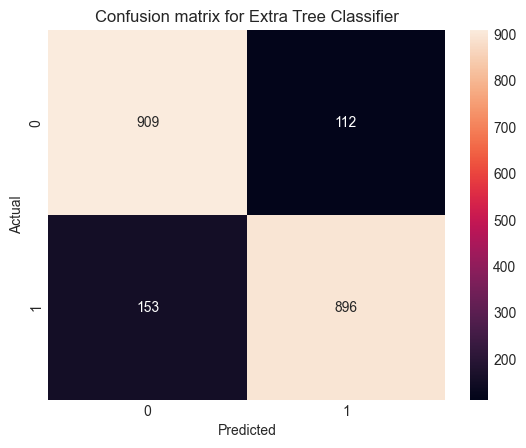

In [73]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- We can see the number of times the model predicted correct and inccorect output with the help of Confusion matrix.

### Saving the model

In [74]:
import joblib
filename = "Churn_prediction.pkl"
joblib.dump(Final_Model, filename)

['Churn_prediction.pkl']